In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from metrics import testMLModel
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [2]:
RANDOM_STATE = 42

In [3]:
df = pd.read_csv("archive/clean_IMDB3.csv")

X = df["clean_review"]
y = df["sentiment"].map({"positive":1, "negative":0})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
pipe_nb = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(lowercase=True)),
    ("clf", MultinomialNB())
])

In [6]:
param_grid_nb = [
    {
        "tfidf__max_features": [20000, 40000],
        "tfidf__ngram_range": [(1,1), (1,2)],
        "tfidf__min_df": [1, 2],
        "clf": [MultinomialNB()],
        "clf__alpha": [0.5, 1.0, 2.0]
    },
    {
        "tfidf__max_features": [20000, 40000],
        "tfidf__ngram_range": [(1,1), (1,2)],
        "tfidf__min_df": [1, 2],
        "clf": [ComplementNB()],
        "clf__alpha": [0.5, 1.0, 2.0]
    }
]

In [7]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [ ]:
grid_nb = GridSearchCV(
    estimator=pipe_nb,
    param_grid=param_grid_nb,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

In [9]:
grid_nb.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"[{'clf': [MultinomialNB()], 'clf__alpha': [0.5, 1.0, ...], 'tfidf__max_features': [20000, 40000], 'tfidf__min_df': [1, 2], ...}, {'clf': [ComplementNB()], 'clf__alpha': [0.5, 1.0, ...], 'tfidf__max_features': [20000, 40000], 'tfidf__min_df': [1, 2], ...}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [10]:
print("NB - Meilleurs paramètres :", grid_nb.best_params_)
print("NB - Meilleure score CV :", grid_nb.best_score_)

NB - Meilleurs paramètres : {'clf': MultinomialNB(), 'clf__alpha': 1.0, 'tfidf__max_features': 40000, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
NB - Meilleure score CV : 0.873875


In [11]:
best_nb = grid_nb.best_estimator_


=== Naive Bayes (best) : Rapport de classification ===
              precision    recall  f1-score   support

           0     0.8861    0.8648    0.8753      5000
           1     0.8680    0.8888    0.8783      5000

    accuracy                         0.8768     10000
   macro avg     0.8770    0.8768    0.8768     10000
weighted avg     0.8770    0.8768    0.8768     10000

=== Naive Bayes (best) : Matrice de confusion ===


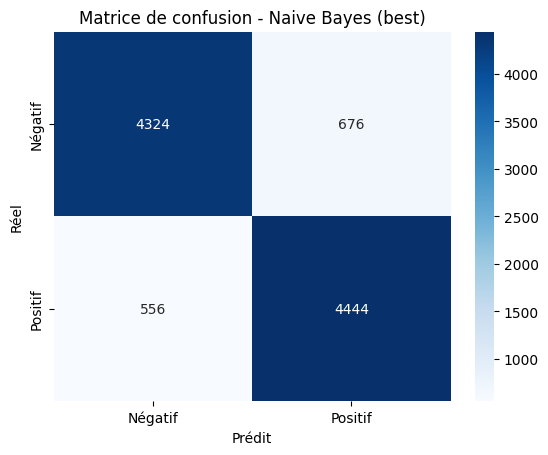

=== Naive Bayes (best) : Courbe d'apprentissage (accuracy) ===


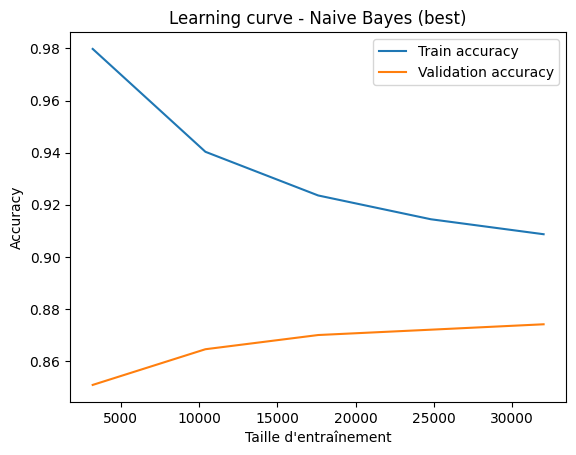

In [12]:
testMLModel(best_nb, X_train, y_train, X_test, y_test, title="Naive Bayes (best)")

In [13]:
import joblib

joblib.dump(best_nb, "nbModelV0.pkl")
joblib.dump(grid_nb, "nbgridV0.pkl")

['nbgridV0.pkl']